In [ ]:
# Problem Set #4
# Dennis Cruz dec2174
# Collaborators: Edward Sanchez, es2903

# Other Resources used:
# Runge Kutta Method: https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/5_Runge_Kutta_method.html
# Python Classes and Objects: https://www.geeksforgeeks.org/python-classes-and-objects/

In [1]:
# Problem #1

import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Defining Class for materials

class materials:
    
    def __init__ (self, rho_0, c, n, Pc):
        self.rho_0 = rho_0
        self.c  = c
        self.n  = n
        self.Pc = Pc

# Testing class:

iron    = materials(8300, 0.00349, 0.528, 10e12)
eq_test = 8300 + 0.00349*10e12**0.528  # just checking the value needed
print (iron.c, eq_test)


0.00349 33816.75401357129


In [4]:
# Defining Runge_Kutta for Coupled ODEs

def RungeKuttaCoupled(x, y, z, dx, dydx, dzdx):
    
    # Calculate Slopes
    k1 = dx*dydx(x, y, z)
    h1 = dx*dzdx(x, y, z)
    k2 = dx*dydx(x+dx/2., y+k1/2., z+h1/2.)
    h2 = dx*dzdx(x+dx/2., y+k1/2., z+h1/2.)
    k3 = dx*dydx(x+dx/2., y+k2/2., z+h2/2.)
    h3 = dx*dzdx(x+dx/2., y+k2/2., z+h2/2.)
    k4 = dx*dydx(x+dx, y+k3, z+h3)
    h4 = dx*dzdx(x+dx, y+k3, z+h3)
    
    # Calculates new x, y and z
    y = y + 1./6.*(k1+2*k2+2*k3+k4)
    z = z + 1./6.*(h1+2*h2+2*h3+h4)
    x = x + dx
    
    return x, y, z



In [7]:
# Defining ODEs and equation of state:

def rho (materials):
    # initial_P = 10e12  # just to check the function worked
    iron = materials(8300, 0.00349, 0.528, initial_P)
    eq_state = iron.rho_0 + iron.c * iron.Pc**iron.n
    return eq_state

def dPdr (r, P, m):
    P = (-(G * m * rho(materials)/float(r**2)))
    return P

def dmdr (r, P, m):
    m = 4*(np.pi)*rho(materials)*(r**2)
    return m

# Testing functions:

print (dPdr (1, 2, 3), dmdr (1, 2, 3))

print (rho(materials)) # Same result as eq_test tested above


-3.1765478283758284e-06 199369.08043955878
15865.28732582074


In [6]:
# Defining initial values

G = 6.674e-11 # Gravitational constant
delta_r      = 1000           # fraction of Earth radius in meters
initial_r    = delta_r
initial_P    = 1e12
initial_rho  = rho(materials)
initial_mass = 0
final_r      = initial_r + delta_r # to have an initial value for the loop to run
Earth_mass   = 5.97219e24       # in kilograms
Earth_radius = 6.371e6          # in meters


# Testing:

print (initial_rho, final_r) # making sure it retrieves the same value

15865.28732582074 2000


In [10]:
# Creating array and RK4 loop:

radius_list   = [initial_r]
pressure_list = [initial_P]
mass_list     = [initial_mass]
density_list  = [initial_rho]

r = initial_r
P = initial_P
m = initial_mass

while r != final_r:
    r, P, m = RungeKuttaCoupled(r, P, m, delta_r, dPdr, dmdr)
    
    if P < 0: # Condiiton to stop loop when pressure goes negative
        final_r = r
    
    else:
        # Final radius and mass in terms of Earth's R & M
        final_radius = r / Earth_radius
        final_mass   = m / Earth_mass

        # Appending values to lists
        radius_list.append(final_radius)
        pressure_list.append(P)
        mass_list.append(final_mass)
        density_list.append(rho(materials))

        initial_P = P         # Changes the value in class(materials) for the next P)

        final_r = r + final_r # Increases the value for the loop to continue running
        #print (r, P, m)



In [11]:
# Printing Values in terms of Earth Mass and Radius:

#print (radius_list, '\n', '\n')
#print (mass_list, '\n', '\n')
#print (density_list)

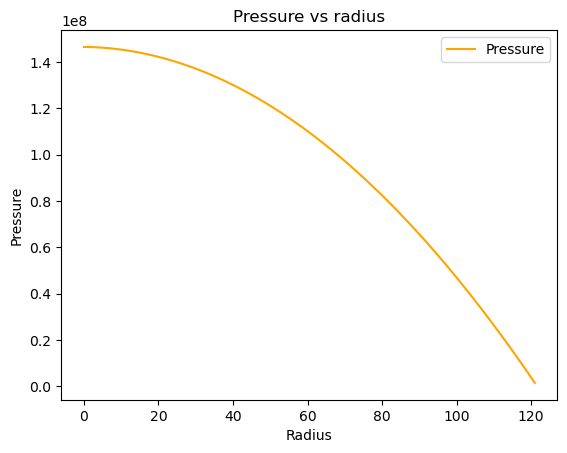

In [12]:
# Plotting 

plt.title("Pressure vs radius")
plt.plot(pressure_list, label="Pressure", color="orange")
plt.xlabel("Radius")
plt.ylabel("Pressure")
plt.legend(loc="best")
plt.show()

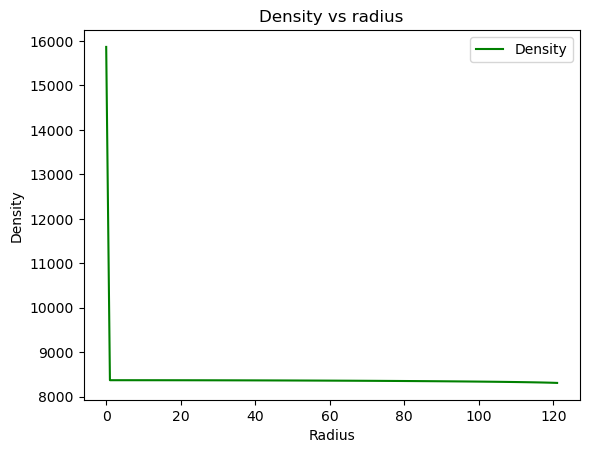

In [13]:
plt.title("Density vs radius")
plt.plot(density_list, label="Density", color="green")
plt.xlabel("Radius")
plt.ylabel("Density")
plt.legend(loc="best")
plt.show()

In [ ]:
# Final Result:

print ("Pressure goes to zero at:")
print ("Final mass = ", final_mass)
print ("Final radius = ", final_radius)

In [ ]:
# Problem 2
# Integration for a range of central pressures for Fe

total_radius_list  = [initial_r]
total_mass_list    = [initial_mass]
total_pressure_list = [initial_P]
total_density_list  = [initial_rho]



# Creating a loop for a range of pressures:

for i in range (11, 31):          # Range of central pressures from 0.1 to 300 Earth Masses

    # Resetting initial values

    # G = 6.674e-11 # Gravitational constant
    delta_r      = 1000            # fraction of Earth radius in meters
    initial_r    = delta_r
    initial_P    = 10**i
    initial_rho  = rho(materials)
    initial_mass = 0
    final_r      = initial_r + delta_r # to have an initial value for the loop to run
    Earth_mass   = 5.97219e24       # in kilograms
    Earth_radius = 6.371e6          # in meters

    r = initial_r
    P = initial_P
    m = initial_mass

    while r != final_r:
        r, P, m = RungeKuttaCoupled(r, P, m, delta_r, dPdr, dmdr)

        if P < 0: # Condiiton to stop loop when pressure goes negative
            final_r = r

        else:
            # Final radius and mass in terms of Earth's R & M
            final_radius = r / Earth_radius
            final_mass   = m / Earth_mass

            initial_P = P         # Changes the value in class(materials) for the next P)

            final_r = r + final_r # Increases the value for the loop to continue running
    
    total_radius_list.append(final_radius)
    total_mass_list.append(final_mass)
    
    print ("Total M and R at P = 10^", i )
    print ("M =", final_mass, "R =", final_radius, '\n')
    


In [ ]:
# Printing different M and R in terms of Earth Radius

print (total_radius_list, '\n' '\n', total_mass_list)

In [ ]:
# Plotting

#use log log for plotting
plt.title("Relation between total mass M and outer radius R")
plt.plot(total_mass_list, label="Mass", color="green")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.legend(loc="best")
plt.show()

I think it is harder to detect higher mass planets because they have a higher radius that would cover the star and we would not be able to see the flux

In [ ]:
# Problem 3
# Defining values MgSiO3

initial_p = 0

def rho (materials):
    # initial_P = 10e12  # just to check the function worked
    mgsio3 = materials (4100., 0.00161, 0.541, initial_P)
    eq_state = mgsio3.rho_0 + mgsio3.c * mgsio3.Pc**mgsio3.n
    return eq_state


# Running loops for each materials

total_radius_list  = [initial_r]
total_mass_list    = [initial_mass]
total_pressure_list = [initial_P]
total_density_list  = [initial_rho]

# Creating a loop for a range of pressures:

for i in range (11, 31):          # Range of central pressures from 0.1 to 300 Earth Masses

    # Resetting initial values

    # G = 6.674e-11 # Gravitational constant
    delta_r      = 1000            # fraction of Earth radius in meters
    initial_r    = delta_r
    initial_P    = 10**i
    initial_rho  = rho(materials)
    initial_mass = 0
    final_r      = initial_r + delta_r # to have an initial value for the loop to run
    Earth_mass   = 5.97219e24       # in kilograms
    Earth_radius = 6.371e6          # in meters

    r = initial_r
    P = initial_P
    m = initial_mass

    while r != final_r:
        r, P, m = RungeKuttaCoupled(r, P, m, delta_r, dPdr, dmdr)

        if P < 0: # Condiiton to stop loop when pressure goes negative
            final_r = r

        else:
            # Final radius and mass in terms of Earth's R & M
            final_radius = r / Earth_radius
            final_mass   = m / Earth_mass

            initial_P = P         # Changes the value in class(materials) for the next P)

            final_r = r + final_r # Increases the value for the loop to continue running
    
    total_radius_list.append(final_radius)
    total_mass_list.append(final_mass)
    
    print ("Total M and R at P = 10^", i )
    print ("M =", final_mass, "R =", final_radius, '\n')
    


In [ ]:
# Printing different M and R in terms of Earth Radius

print (total_radius_list, '\n' '\n', total_mass_list)

In [ ]:
# Plotting

#use log log for plotting
plt.title("Relation between total mass M and outer radius R for MgSiO3")
plt.plot(total_mass_list, label="Mass", color="green")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.legend(loc="best")
plt.show()

In [ ]:
# Defining values for H2O

initial_p = 0

def rho (materials):
    # initial_P = 10e12  # just to check the function worked
    h20    = materials (1460., 0.00311, 0.513, initial_p)
    eq_state = h20.rho_0 + h20.c * h20.Pc**h20.n
    return eq_state

# Running loops for each materials

total_radius_list  = [initial_r]
total_mass_list    = [initial_mass]
total_pressure_list = [initial_P]
total_density_list  = [initial_rho]

# Creating a loop for a range of pressures:

for i in range (11, 16):          # Range of central pressures from 0.1 to 300 Earth Masses

    # Resetting initial values

    # G = 6.674e-11 # Gravitational constant
    delta_r      = 1000            # fraction of Earth radius in meters
    initial_r    = delta_r
    initial_P    = 10**i
    initial_rho  = rho(materials)
    initial_mass = 0
    final_r      = initial_r + delta_r # to have an initial value for the loop to run
    Earth_mass   = 5.97219e24       # in kilograms
    Earth_radius = 6.371e6          # in meters

    r = initial_r
    P = initial_P
    m = initial_mass

    while r != final_r:
        r, P, m = RungeKuttaCoupled(r, P, m, delta_r, dPdr, dmdr)

        if P < 0: # Condiiton to stop loop when pressure goes negative
            final_r = r

        else:
            # Final radius and mass in terms of Earth's R & M
            final_radius = r / Earth_radius
            final_mass   = m / Earth_mass

            initial_P = P         # Changes the value in class(materials) for the next P)

            final_r = r + final_r # Increases the value for the loop to continue running
    
    total_radius_list.append(final_radius)
    total_mass_list.append(final_mass)
    
    print ("Total M and R at P = 10^", i )
    print ("M =", final_mass, "R =", final_radius, '\n')

In [ ]:
# Printing different M and R in terms of Earth Radius

print (total_radius_list, '\n' '\n', total_mass_list)

In [ ]:
# Plotting

#use log log for plotting
plt.title("Relation between total mass M and outer radius R for H20")
plt.plot(total_mass_list, label="Mass", color="green")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.legend(loc="best")
plt.show()